In [181]:
import torch

In [182]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [183]:
from torchvision import datasets
from torchvision.transforms import ToTensor
train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)

In [184]:
print(train_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


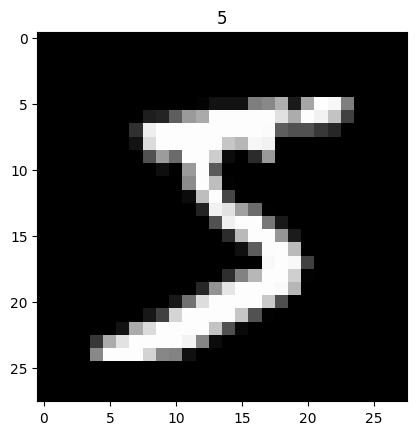

In [185]:
import matplotlib.pyplot as plt
plt.imshow(train_data.data[0], cmap='gray')
plt.title('%i' % train_data.targets[0])
plt.show()

In [186]:
from torch.utils.data import DataLoader
loaders = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
    
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x14efec1d0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x163690350>}

In [187]:
import torch.nn as nn
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1,              
                out_channels=16,            
                kernel_size=5,              
                stride=1,                   
                padding=2,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(16, 32, 5, 1, 2),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)       
        output = self.out(x)
        return output, x    # return x for visualization

In [188]:
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [189]:
loss_func = nn.CrossEntropyLoss()   
loss_func

CrossEntropyLoss()

In [190]:
from torch import optim
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)   
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [191]:
from torch.autograd import Variable
num_epochs = 10
def train(num_epochs, cnn, loaders):
    
    cnn.train()
    # create loss history
    loss_history = []
        
    # Train the model
    total_step = len(loaders['train'])
        
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):
            
            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images)   # batch x
            b_y = Variable(labels)   # batch y
            output = cnn(b_x)[0]               
            loss = loss_func(output, b_y)
            loss_history.append(loss.item())
            
            # clear gradients for this training step   
            optimizer.zero_grad()           
            
            # backpropagation, compute gradients 
            loss.backward()    
            # apply gradients             
            optimizer.step()                
            
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
                pass
        
        pass
    
    
    pass
    return loss_history


In [192]:
loss_history = train(num_epochs, cnn, loaders)

Epoch [1/10], Step [100/600], Loss: 0.0924
Epoch [1/10], Step [200/600], Loss: 0.1006
Epoch [1/10], Step [300/600], Loss: 0.0434
Epoch [1/10], Step [400/600], Loss: 0.1149
Epoch [1/10], Step [500/600], Loss: 0.0365
Epoch [1/10], Step [600/600], Loss: 0.0480
Epoch [2/10], Step [100/600], Loss: 0.0226
Epoch [2/10], Step [200/600], Loss: 0.0162
Epoch [2/10], Step [300/600], Loss: 0.0025
Epoch [2/10], Step [400/600], Loss: 0.0503
Epoch [2/10], Step [500/600], Loss: 0.1727
Epoch [2/10], Step [600/600], Loss: 0.1837
Epoch [3/10], Step [100/600], Loss: 0.0432
Epoch [3/10], Step [200/600], Loss: 0.0350
Epoch [3/10], Step [300/600], Loss: 0.0501
Epoch [3/10], Step [400/600], Loss: 0.0247
Epoch [3/10], Step [500/600], Loss: 0.0675
Epoch [3/10], Step [600/600], Loss: 0.0236
Epoch [4/10], Step [100/600], Loss: 0.0351
Epoch [4/10], Step [200/600], Loss: 0.0108
Epoch [4/10], Step [300/600], Loss: 0.0027
Epoch [4/10], Step [400/600], Loss: 0.0323
Epoch [4/10], Step [500/600], Loss: 0.0608
Epoch [4/10

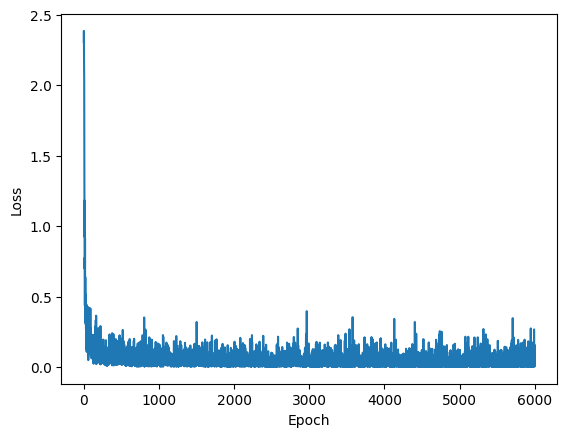

In [193]:
# plot loss_history
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [194]:
def test(model):
    # Test the model
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders['test']:
            test_output, last_layer = model(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
            pass
    print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)
    
    pass

In [195]:
test(cnn)

Test Accuracy of the model on the 10000 test images: 1.00


In [196]:
from torchvision.transforms import Compose, RandomRotation
from torchvision.transforms import Lambda
import torchvision.transforms.functional as TF

# Defining the transformation
transform = Compose([
    Lambda(lambda img: TF.rotate(img, 90)), # Rotate images by exactly 90 degrees
    ToTensor()                              # Convert PIL image to PyTorch tensor
])

# Applying the transformation to train and test data
train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = transform, 
    download = True,            
)

test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = transform
)

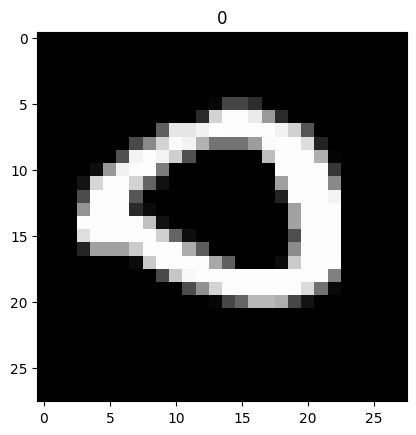

In [197]:
import matplotlib.pyplot as plt

# Create a DataLoader for the train_data with the transformation
train_loader = torch.utils.data.DataLoader(train_data, batch_size=1, shuffle=True)

# Get a single batch (in this case, one image) from the DataLoader
images, labels = next(iter(train_loader))


# Since the image is now a tensor, convert it to a NumPy array
image = images[0].numpy()

# The image will be in shape (1, 28, 28), so you'll need to reshape it to (28, 28)
image = image.reshape(28, 28)

# Now you can use plt.imshow to display the image
plt.imshow(image, cmap='gray')
plt.title('%i' % labels[0])
plt.show()

In [198]:
loaders = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=0),
    
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=0),
}

In [199]:
cnn2 = CNN()
loss_func = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(cnn2.parameters(), lr=0.01)

In [200]:
# train rotated data
loss_history1 = train(num_epochs, cnn2, loaders)

Epoch [1/10], Step [100/600], Loss: 0.2106
Epoch [1/10], Step [200/600], Loss: 0.0346
Epoch [1/10], Step [300/600], Loss: 0.1598
Epoch [1/10], Step [400/600], Loss: 0.0479
Epoch [1/10], Step [500/600], Loss: 0.0349
Epoch [1/10], Step [600/600], Loss: 0.0402
Epoch [2/10], Step [100/600], Loss: 0.0139
Epoch [2/10], Step [200/600], Loss: 0.0546
Epoch [2/10], Step [300/600], Loss: 0.0660
Epoch [2/10], Step [400/600], Loss: 0.0675
Epoch [2/10], Step [500/600], Loss: 0.0855
Epoch [2/10], Step [600/600], Loss: 0.0305
Epoch [3/10], Step [100/600], Loss: 0.0698
Epoch [3/10], Step [200/600], Loss: 0.1274
Epoch [3/10], Step [300/600], Loss: 0.1283
Epoch [3/10], Step [400/600], Loss: 0.0747
Epoch [3/10], Step [500/600], Loss: 0.0466
Epoch [3/10], Step [600/600], Loss: 0.0132
Epoch [4/10], Step [100/600], Loss: 0.0647
Epoch [4/10], Step [200/600], Loss: 0.2275
Epoch [4/10], Step [300/600], Loss: 0.0492
Epoch [4/10], Step [400/600], Loss: 0.0804
Epoch [4/10], Step [500/600], Loss: 0.0460
Epoch [4/10

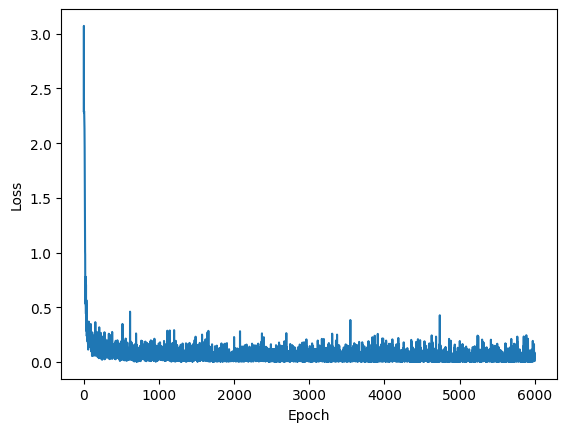

In [201]:
# plot loss_history
plt.plot(loss_history1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [202]:
def test_train(cnn):
    # Test the model
    cnn.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders['train']:
            test_output, last_layer = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
            pass
    print('Test Accuracy of the model on the train images: %.2f' % accuracy)
    
    pass



In [203]:
test_train(cnn2)

Test Accuracy of the model on the train images: 0.98


In [204]:
test(cnn2)

Test Accuracy of the model on the 10000 test images: 0.97
